<a href="https://colab.research.google.com/github/KishoreAnalyticsLab/RunWithData/blob/main/AeroFit_BusinessCase_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
 from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [32]:
df = pd.read_csv('/content/drive/MyDrive/aerofit_treadmill.csv')
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


In [33]:
"""Problem Statement

Creating a customer profile & their characteristics and to find how it influence the usage of their products.
Finding the correlation between the parameters (eg.)
For each AeroFit treadmill product, constructing two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.

"""

'Problem Statement\n\nCreating a customer profile & their characteristics and to find how it influence the usage of their products.\nFinding the correlation between the parameters (eg.)\nFor each AeroFit treadmill product, constructing two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.\n\n'

Import the dataset and do usual data analysis steps like checking the structure & characteristics of the dataset

In [34]:

df.info()
#datatype and non_null counts can be observed here
#numerical and categorical columns were defined appropriately and their datatype also matches.
#Three columns have Integer Datatype and other have Object Datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [35]:
df.shape #180 rows and 9 columns are present in this dataset

print(f'Shape of the given dataframe are: \n rows: {df.shape[0]}\n columns: {df.shape[1]} \n dimension : {df.ndim}')

Shape of the given dataframe are: 
 rows: 180
 columns: 9 
 dimension : 2


In [36]:
df.isnull().any() #There is no null values found in the dataset

,0
Product,False
Age,False
Gender,False
Education,False
MaritalStatus,False
Usage,False
Fitness,False
Income,False
Miles,False


In [37]:
#We calculated the value counts of all the categorical attributes.
df1 = df[['Product', 'Gender', 'MaritalStatus', 'Fitness']]

def value_counts(x):
  for i in df1:
    print(f'The Value Counts of {df1[i].value_counts()} \n\n')
  return 0
value_counts(df1)


The Value Counts of Product
KP281    80
KP481    60
KP781    40
Name: count, dtype: int64 


The Value Counts of Gender
Male      104
Female     76
Name: count, dtype: int64 


The Value Counts of MaritalStatus
Partnered    107
Single        73
Name: count, dtype: int64 


The Value Counts of Fitness
3    97
5    31
2    26
4    24
1     2
Name: count, dtype: int64 




0

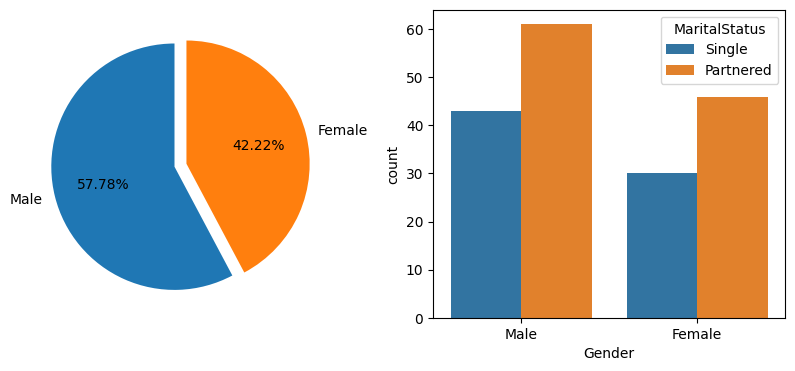

In [38]:
plt.figure(figsize = (10,4))

plt.subplot(1,2,1)
gender_df = df['Gender'].value_counts()
plt.pie(gender_df, labels = gender_df.index, explode = (0.1,0), startangle = 90, autopct = '%.2f%%')

plt.subplot(1,2,2)
sns.countplot(data = df, x = 'Gender', hue = 'MaritalStatus')

plt.show()

#Below are the split of Male and Female Population, 42% of population is Female and 58% is Female population.
#Second graph gives the insights on their MaritalStatus - Single Population is less compare to Partnered.


In [39]:
#Statistical summary of all the numerical attributes.
#Mean, Standard Deviation, Min, Max, Median
des_df = df.describe()
des_df

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


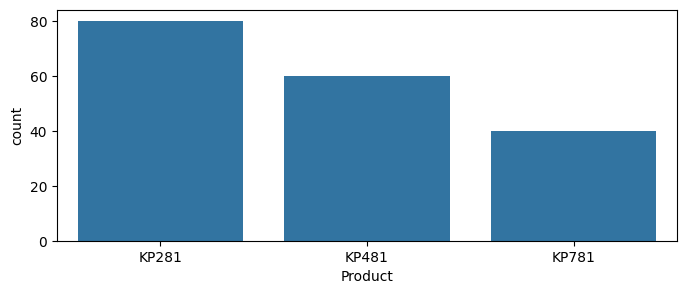

In [40]:
plt.figure(figsize = (8,3))
sns.countplot(data = df, x = 'Product')
plt.show()
#Count of each products

In [41]:
#Detect Outliers

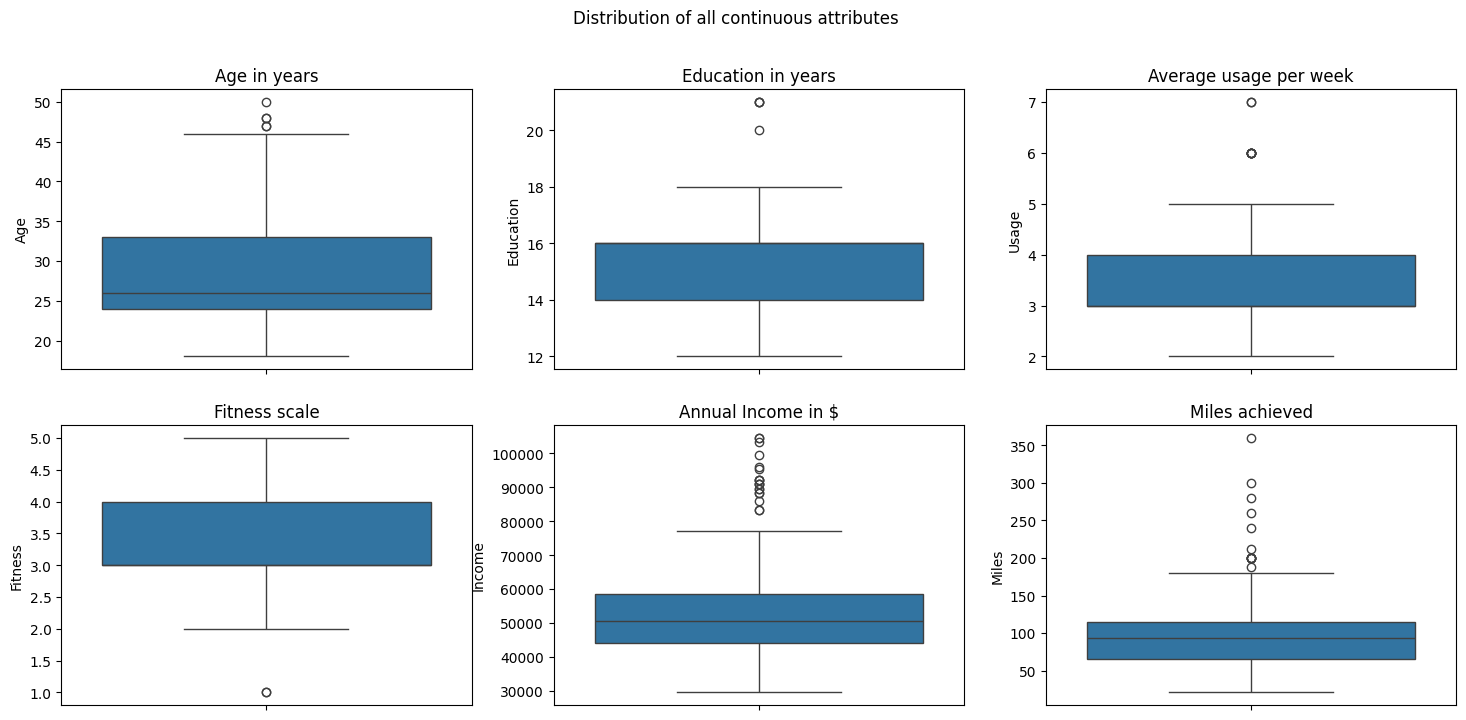

In [42]:
plt.figure(figsize= (18,8))

plt.subplot(2,3,1)
sns.boxplot(y = 'Age', data = df)
plt.title('Age in years')

plt.subplot(2,3,2)
sns.boxplot(y = 'Education', data = df)
plt.title('Education in years')

plt.subplot(2,3,3)
sns.boxplot(y = 'Usage', data = df)
plt.title('Average usage per week')


plt.subplot(2,3,4)
sns.boxplot(y = 'Fitness', data = df)
plt.title('Fitness scale')


plt.subplot(2,3,5)
sns.boxplot(y = 'Income', data = df)
plt.title('Annual Income in $')

plt.subplot(2,3,6)
sns.boxplot(y = 'Miles', data = df)
plt.title('Miles achieved')

plt.suptitle('Distribution of all continuous attributes')
plt.show()

  Observation Insights from above box plots and statistical summary:

1. Age column has outliers above 45. Median age of population is 26 years and almost 75 % of the population who are using Aerofit are between 18 to 33 years(young population).
2. In Education column, We can say outliers are minimal because we can see minimal difference between mean and median. 75% of population are having  between 12 to 16 years of education.
3. In Usage column also, we can say outliers are minimal. The average number of times most of the customers use treadmill is between 2 to 4 times per week.
4. In a scale of 5, 99 % of the population have rated their fitness between 2 to 5 whereas 50% of the population rated 3 and 5 rating.
5. Annual Income and Miles Achieved columns has lot of outliers, can be observed from difference between mean and median too.

In [43]:
#Clipping the continous columns between 5 and 95 percentile
def clipping_df(df): #Fuction to clip the data
  continuous_columns = df.select_dtypes(include=[np.number]).columns

  for column in continuous_columns:
    lower_percentile = df[column].quantile(0.05)
    upper_percentile = df[column].quantile(0.95)
    df[column] = np.clip(df[column], lower_percentile , upper_percentile)

df_new = df.copy()

clipping_df(df_new) #Calling the function


In [44]:
df_new.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.641389,15.572222,3.396944,3.322222,53477.070000,101.088889
std,6.446373,1.362017,0.952682,0.937461,15463.662523,43.364286
min,20.000000,14.000000,2.000000,2.000000,34053.150000,47.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,43.050000,18.000000,5.050000,5.000000,90948.250000,200.000000


3. Check if features like marital status, Gender, and age have any effect on the product
purchased

In [45]:
#Finding out if categories have impact on the type of product purchased
#Categories - Gender, Maritialstatus, Fitness


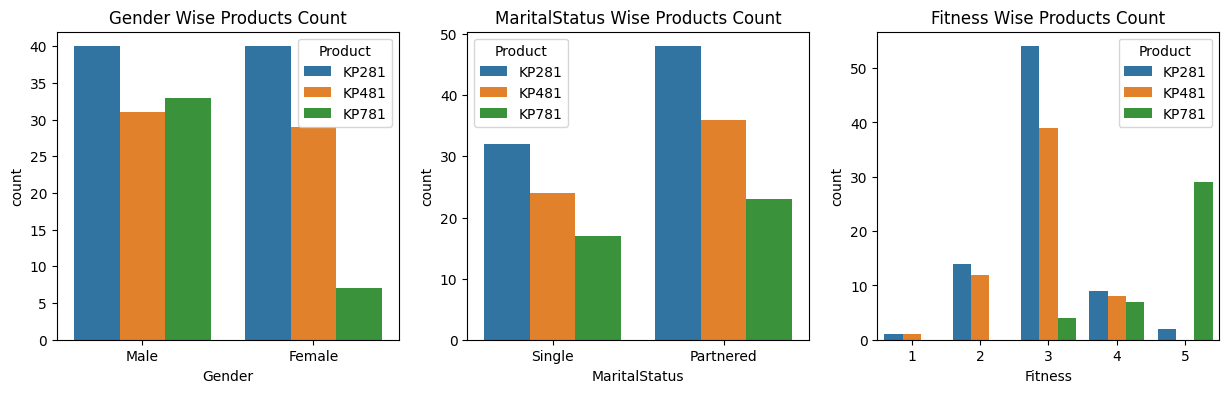

In [46]:
plt.figure(figsize = (15,4))

plt.subplot(1,3,1)
sns.countplot(data = df, x = 'Gender', hue = 'Product')
plt.title('Gender Wise Products Count')

plt.subplot(1,3,2)
sns.countplot(data = df, x = 'MaritalStatus', hue = 'Product')
plt.title('MaritalStatus Wise Products Count')

plt.subplot(1,3,3)
sns.countplot(data = df, x = 'Fitness', hue = 'Product')
plt.title('Fitness Wise Products Count')

plt.show()

# Insights / Observation from the Category wise analysis:


1.   **KP281 Model:**
*   KP281 is the **'most popular'** among any other models. Moreover, it is popular among both Male and Female population.
*   Whether they are Single and Partnered, most people preferred KP281 Model.
*   People with **'Average'** Fitness scale(average shaped) preferred KP281 Model.
2.   **KP781 Model**
*   KP781 is the **second** most popular product among Male population but it is the **least** preferred model among Female population.
*   Most of the People who are in **'Best Shape'**(Fitness) preferred KP781 Model.
3.   **KP481**
*   KP481 is the averagely preferred model among any population.

By the above insights we can say that, People who are **Expert**, more into the Fitness and in **Best Shape** have preferred **KP781** Model. It supposed to be the more advanced & costly product. **KP281** be the **Beginner friendly** model and so most categories of people have preferred it. **KP481** is the **intermediate** model among the others.








In [47]:
#Binning the appropriate continuous variables like Age, Income and Education for future analysis.

#Creating Education buckets
education_bins = [0,14,16,18,22]
education_labels = ['Below 14 yrs', '14 to 16 yrs', '16 to 18 yrs', 'Above 18 yrs']
df_new['Education_bin'] = pd.cut(df_new['Education'], education_bins, labels = education_labels)

#Creating Age buckets
age_bins = [0,25,35,45,55,60]
age_labels = ['Under_25', '25-35', '35-45', '45-55', 'Above_55']
df_new['Age_bin'] = pd.cut(df_new['Age'], age_bins, labels = age_labels)

#Creating Income buckets
income_bins = [0, 44000, 51000, 59000, 81000, 150000]
income_labels = ['Under_44k', '44k-51k', '51k-59k', '59k-81k', 'Above 81k']
df_new['Income_bin'] = pd.cut(df_new['Income'], income_bins, labels = income_labels)


df_new.head()


,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Education_bin,Age_bin,Income_bin
0,KP281,20.0,Male,14,Single,3.0,4,34053.15,112,Below 14 yrs,Under_25,Under_44k
1,KP281,20.0,Male,15,Single,2.0,3,34053.15,75,14 to 16 yrs,Under_25,Under_44k
2,KP281,20.0,Female,14,Partnered,4.0,3,34053.15,66,Below 14 yrs,Under_25,Under_44k
3,KP281,20.0,Male,14,Single,3.0,3,34053.15,85,Below 14 yrs,Under_25,Under_44k
4,KP281,20.0,Male,14,Partnered,4.0,2,35247.00,47,Below 14 yrs,Under_25,Under_44k


In [48]:
#Finding out how Continuous variable have impact on the type of product purchased
#Continuous variable - Age, Education, Income, Miles

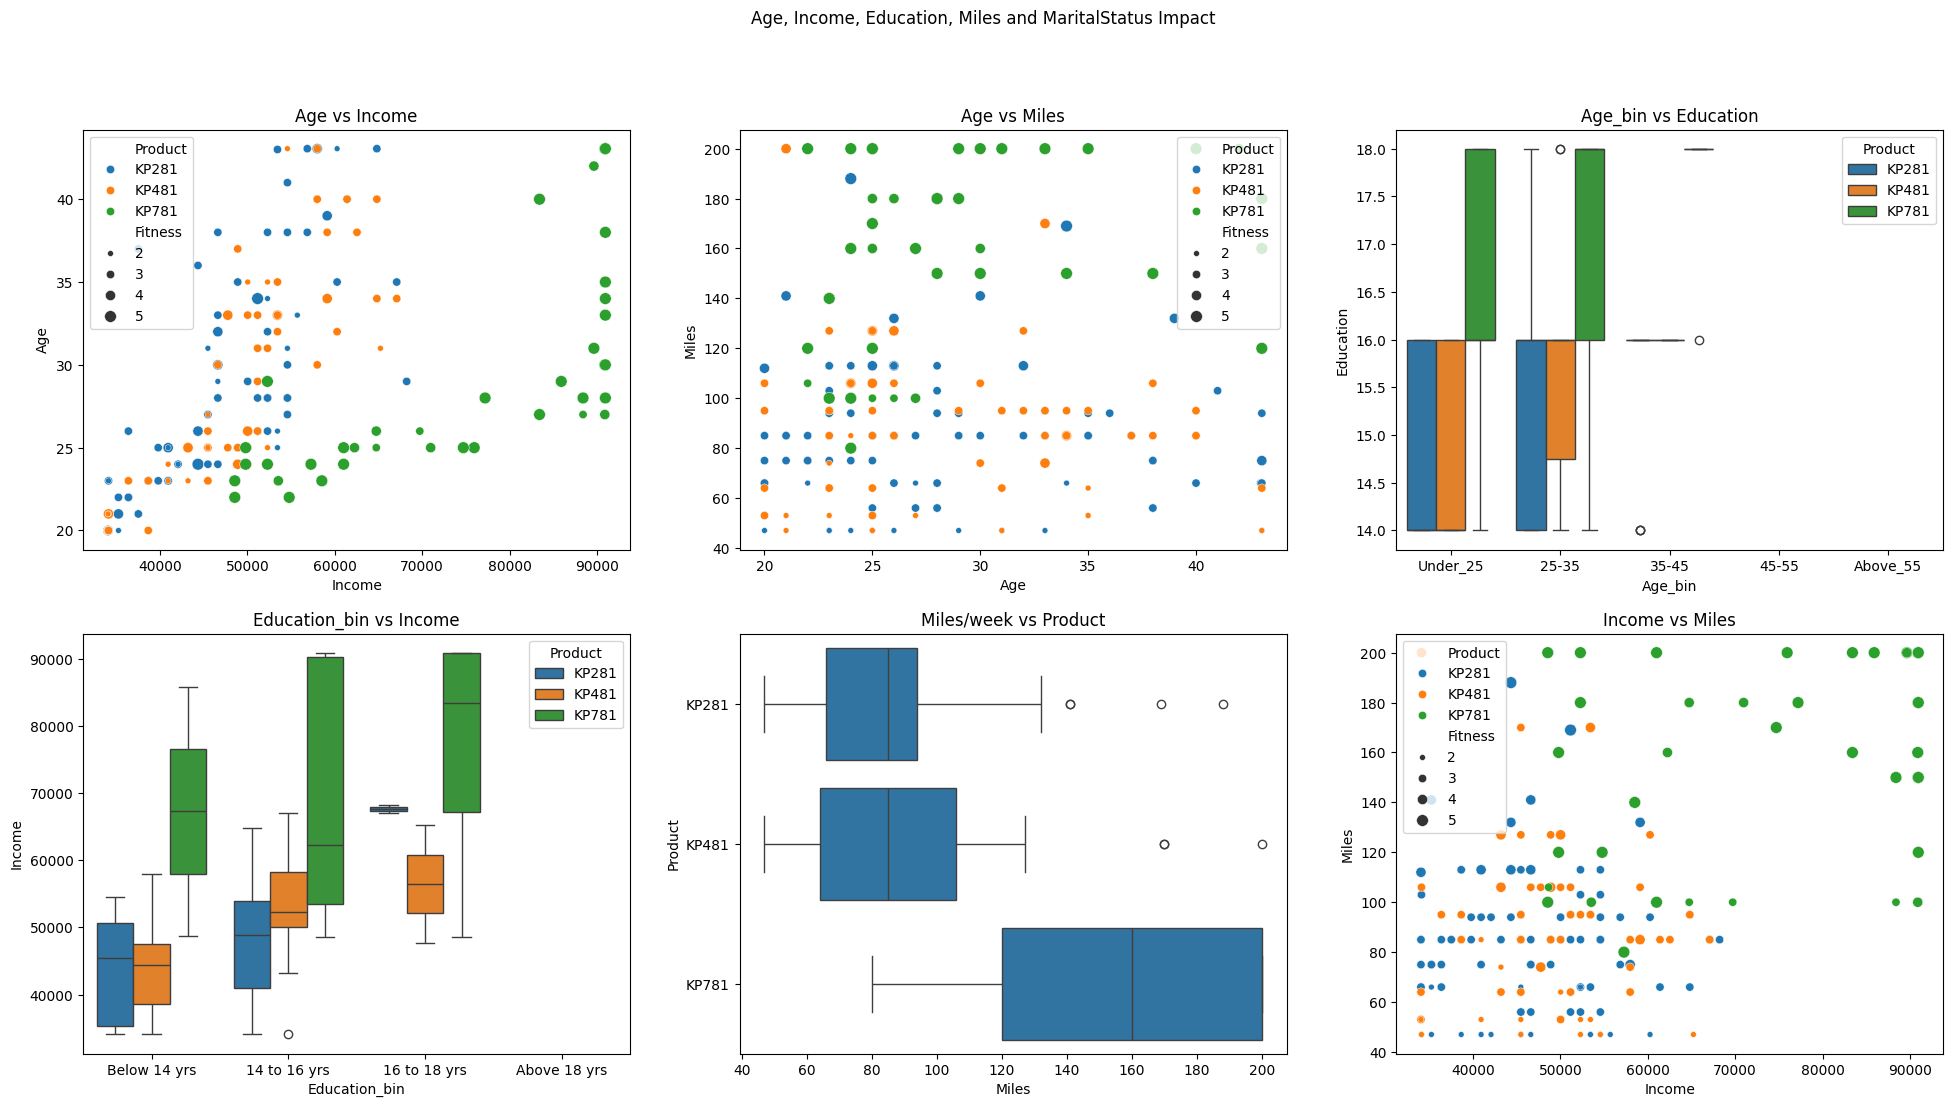

In [49]:
plt.figure(figsize = (24,12))

plt.subplot(2,3,1)
sns.scatterplot(data = df_new, y = 'Age', x = 'Income', hue = 'Product', size = 'Fitness')
plt.title('Age vs Income')

plt.subplot(2,3,2)
sns.scatterplot(data = df_new, x = 'Age', y = 'Miles', hue = 'Product', size = 'Fitness')
plt.title('Age vs Miles')

plt.subplot(2,3,3)
sns.boxplot(data = df_new, x = 'Age_bin', y = 'Education', hue = 'Product')
plt.title('Age_bin vs Education')

plt.subplot(2,3,4)
sns.boxplot(data = df_new, x = 'Education_bin', y = 'Income', hue = 'Product')
plt.title('Education_bin vs Income')


plt.subplot(2,3,5)
sns.boxplot(data = df_new, x = 'Miles', y = 'Product')
plt.title('Miles/week vs Product')

plt.subplot(2,3,6)
sns.scatterplot(data = df_new, x = 'Income', y = 'Miles', hue = 'Product', size = 'Fitness')
plt.title('Income vs Miles')

#sns.boxplot(data = df_new, x = 'Product', y = 'Income')
#plt.title('Education_bins vs Miles')

plt.suptitle("Age, Income, Education, Miles and MaritalStatus Impact")
plt.show()

# Insights / Observation from the above analysis:
Capturing how does the different parameters like Age, Income, Education and their Fitness level impact the product purchased.

1.   **Age vs Income vs Fitness**:
*   Middle Aged (25 to 32) people with moderately higher income has always preferred KP781 Model. They are also seems to be in their good shape.
*   Young people (20 to 30) below the median income level have preferred KP281 and KP481 models.
2.   **Education vs Income**:
*   People with **Below 16yrs** of education and with **higher** income level have preferred **KP781** model significantly. Meanwhile, people with same education with considerably **low** income level have preferred **KP281 & KP481** Model
*   People with **Above 16yrs** of education are earning more income and also preferred KP781 model more
3.   **Miles**
*   People who thought they will walk **>150 miles** each week have preferred KP781 model.
*   List item




2.   List item









# 4. Representing the marginal probability like - what percent of customers have purchased KP281, KP481, or KP781 in a table (can use pandas.crosstab here)

In [50]:
pd.crosstab(df_new['Product'], columns = [df_new.Gender], margins = True, margins_name = 'Total', normalize = True)
#crosstab for each product with Gender

Gender,Female,Male,Total
Product,,,
KP281,0.222222,0.222222,0.444444
KP481,0.161111,0.172222,0.333333
KP781,0.038889,0.183333,0.222222
Total,0.422222,0.577778,1.000000


From the above table,


1.   **Percentage** :
In total population, **44**% of the people bought **KP281**. Whereas, **33**% people bought **KP481** and **22**% of the population bought **KP781** model
2.   **Marginal Probabilities**:
Probability of KP281 purchased by the people  - **0.44**
Probability of KP481 purchased by the people  - **0.33**
Probability of KP781 purchased by the people  - **0.22**





In [51]:
pd.crosstab(df_new['Product'], columns = [df_new.Gender, df_new.MaritalStatus], margins = True, margins_name = 'Total', normalize = True)
#crosstab for each product with Gender and Marital Status of the population

Gender           Female                Male               Total
MaritalStatus Partnered    Single Partnered    Single          
Product                                                        
KP281          0.150000  0.072222  0.116667  0.105556  0.444444
KP481          0.083333  0.077778  0.116667  0.055556  0.333333
KP781          0.022222  0.016667  0.105556  0.077778  0.222222
Total          0.255556  0.166667  0.338889  0.238889  1.000000

# Conditional Probabilities of Each product based on Gender and Marital Status
Note: Values for the calculation were taken from the above table. Only few probabilities were mentioned below.



*   Out of Male & Female, Probability of **Female** customer purchasing any one of the product is **0.42**
  1.   Given the customer is **Female**, Probability that she will by purchase either KP481 or KP281 - **0.38**
  2.   Given the customer is **Female**, Probability that she will by purchase either KP781 or KP481 - **0.20**
*    Out of Male & Female, Probability of **Male** customer purchasing any one of the product is **0.58**
  1.   Given the customer is **Male**, Probability that he will by purchase either KP481 or KP281 - **0.39**
  2.   Given the customer is **Male**, Probability that he will by purchase either KP781 or KP481 - **0.35**
  2.   Given the customer is **Male**, Probability that he will by purchase either KP781 or KP281 - **0.40**
*   Conditional Probability based on Gender and Marital Status:
  1.   Given the customer is **Female & Single**, Probability that she will by purchase either KP781- **0.016**
  2.   Given the customer is **Female & Partnered**, Probability that she will by purchase either KP281- **0.15**
  3.   Given the customer is **Male & Single**, Probability that he will by purchase either KP481- **0.05**
  4.   Given the customer is **Male & Partnered**, Probability that he will by purchase either KP781- **0.10**







In [52]:
pd.crosstab(index = [df_new['Product'], df_new.Gender, df_new.MaritalStatus], columns = [df_new.Age_bin, df_new.Income_bin], margins = True, margins_name = 'Total', normalize = True)
#Probabilities of each product categorized based on Age-bins, Income-bins, Gender, MaritalStatus.

Age_bin                       Under_25                                \
Income_bin                   Under_44k   44k-51k   51k-59k   59k-81k   
Product Gender MaritalStatus                                           
KP281   Female Partnered      0.044444  0.011111  0.005556  0.000000   
               Single         0.027778  0.005556  0.000000  0.000000   
        Male   Partnered      0.027778  0.005556  0.000000  0.000000   
               Single         0.055556  0.005556  0.000000  0.000000   
KP481   Female Partnered      0.016667  0.011111  0.000000  0.000000   
               Single         0.022222  0.016667  0.000000  0.000000   
        Male   Partnered      0.027778  0.022222  0.005556  0.000000   
               Single         0.016667  0.016667  0.000000  0.000000   
KP781   Female Partnered      0.000000  0.000000  0.000000  0.005556   
               Single         0.000000  0.000000  0.011111  0.000000   
        Male   Partnered      0.000000  0.005556  0.005556  0.027778   
               Single         0.000000  0.022222  0.011111  0.005556   
Total                         0.238889  0.122222  0.038889  0.038889   

Age_bin                          25-35                                \
Income_bin                   Under_44k   44k-51k   51k-59k   59k-81k   
Product Gender MaritalStatus                                           
KP281   Female Partnered      0.000000  0.038889  0.022222  0.005556   
               Single         0.005556  0.011111  0.011111  0.005556   
        Male   Partnered      0.000000  0.016667  0.022222  0.005556   
               Single         0.000000  0.005556  0.027778  0.000000   
KP481   Female Partnered      0.000000  0.011111  0.022222  0.005556   
               Single         0.000000  0.022222  0.005556  0.005556   
        Male   Partnered      0.000000  0.000000  0.033333  0.005556   
               Single         0.000000  0.005556  0.005556  0.011111   
KP781   Female Partnered      0.000000  0.000000  0.000000  0.000000   
               Single         0.000000  0.000000  0.000000  0.005556   
        Male   Partnered      0.000000  0.000000  0.000000  0.011111   
               Single         0.000000  0.000000  0.005556  0.000000   
Total                         0.005556  0.111111  0.155556  0.061111   

Age_bin                                    35-45                      \
Income_bin                   Above 81k Under_44k   44k-51k   51k-59k   
Product Gender MaritalStatus                                           
KP281   Female Partnered      0.000000  0.005556  0.000000  0.005556   
               Single         0.000000  0.000000  0.000000  0.005556   
        Male   Partnered      0.000000  0.000000  0.005556  0.022222   
               Single         0.000000  0.000000  0.005556  0.005556   
KP481   Female Partnered      0.000000  0.000000  0.005556  0.000000   
               Single         0.000000  0.000000  0.000000  0.005556   
        Male   Partnered      0.000000  0.000000  0.000000  0.011111   
               Single         0.000000  0.000000  0.000000  0.000000   
KP781   Female Partnered      0.016667  0.000000  0.000000  0.000000   
               Single         0.000000  0.000000  0.000000  0.000000   
        Male   Partnered      0.038889  0.000000  0.000000  0.000000   
               Single         0.016667  0.000000  0.000000  0.000000   
Total                         0.072222  0.005556  0.016667  0.055556   

Age_bin                                              Total  
Income_bin                     59k-81k Above 81k            
Product Gender MaritalStatus                                
KP281   Female Partnered      0.011111  0.000000  0.150000  
               Single         0.000000  0.000000  0.072222  
        Male   Partnered      0.011111  0.000000  0.116667  
               Single         0.000000  0.000000  0.105556  
KP481   Female Partnered      0.011111  0.000000  0.083333  
               Single         0.000000  0.000000  0.0

In [53]:
df6 = df_new[df_new.Product == 'KP281']
pd.crosstab(index = [df6.Gender, df6.MaritalStatus], columns = [df6.Age_bin, df6.Income_bin], margins = True, margins_name = 'Total', normalize = True)

#Given the product is KP281 model, Probabilities of population in different categories choosing this product

Age_bin               Under_25                     25-35                  \
Income_bin           Under_44k 44k-51k 51k-59k Under_44k 44k-51k 51k-59k   
Gender MaritalStatus                                                       
Female Partnered        0.1000  0.0250  0.0125    0.0000  0.0875  0.0500   
       Single           0.0625  0.0125  0.0000    0.0125  0.0250  0.0250   
Male   Partnered        0.0625  0.0125  0.0000    0.0000  0.0375  0.0500   
       Single           0.1250  0.0125  0.0000    0.0000  0.0125  0.0625   
Total                   0.3500  0.0625  0.0125    0.0125  0.1625  0.1875   

Age_bin                          35-45                           Total  
Income_bin           59k-81k Under_44k 44k-51k 51k-59k 59k-81k          
Gender MaritalStatus                                                    
Female Partnered      0.0125    0.0125  0.0000  0.0125   0.025  0.3375  
       Single         0.0125    0.0000  0.0000  0.0125   0.000  0.1625  
Male   Partnered      0.0125    0.0000  0.0125  0.0500   0.025  0.2625  
       Single         0.0000    0.0000  0.0125  0.0125   0.000  0.2375  
Total                 0.0375    0.0125  0.0250  0.0875   0.050  1.0000

In [54]:
df7 = df_new[df_new.Product == 'KP481']
pd.crosstab(index = [df7.Gender, df7.MaritalStatus], columns = [df7.Age_bin, df7.Income_bin], margins = True, margins_name = 'Total', normalize = True)

#Given the product is KP481 model, Probabilities of population in different categories choosing this product

Age_bin               Under_25                         25-35            \
Income_bin           Under_44k   44k-51k   51k-59k   44k-51k   51k-59k   
Gender MaritalStatus                                                     
Female Partnered      0.050000  0.033333  0.000000  0.033333  0.066667   
       Single         0.066667  0.050000  0.000000  0.066667  0.016667   
Male   Partnered      0.083333  0.066667  0.016667  0.000000  0.100000   
       Single         0.050000  0.050000  0.000000  0.016667  0.016667   
Total                 0.250000  0.200000  0.016667  0.116667  0.200000   

Age_bin                            35-45                         Total  
Income_bin             59k-81k   44k-51k   51k-59k   59k-81k            
Gender MaritalStatus                                                    
Female Partnered      0.016667  0.016667  0.000000  0.033333  0.250000  
       Single         0.016667  0.000000  0.016667  0.000000  0.233333  
Male   Partnered      0.016667  0.000000  0.033333  0.033333  0.350000  
       Single         0.033333  0.000000  0.000000  0.000000  0.166667  
Total                 0.083333  0.016667  0.050000  0.066667  1.000000

In [55]:
df8 = df_new[df_new.Product == 'KP781']
pd.crosstab(index = [df8.Gender, df8.MaritalStatus], columns = [df8.Age_bin, df8.Income_bin], margins = True, margins_name = 'Total', normalize = True)

#Given the product is KP781 model, Probabilities of population in different categories choosing this product

Age_bin              Under_25                   25-35                    \
Income_bin            44k-51k 51k-59k 59k-81k 51k-59k 59k-81k Above 81k   
Gender MaritalStatus                                                      
Female Partnered        0.000   0.000   0.025   0.000   0.000     0.075   
       Single           0.000   0.050   0.000   0.000   0.025     0.000   
Male   Partnered        0.025   0.025   0.125   0.000   0.050     0.175   
       Single           0.100   0.050   0.025   0.025   0.000     0.075   
Total                   0.125   0.125   0.175   0.025   0.075     0.325   

Age_bin                  35-45  Total  
Income_bin           Above 81k         
Gender MaritalStatus                   
Female Partnered         0.000  0.100  
       Single            0.000  0.075  
Male   Partnered         0.075  0.475  
       Single            0.075  0.350  
Total                    0.150  1.000

# 5. Check correlation among different factors using heat maps or pair plots.

In [56]:
df2 = df[['Age','Education', 'Fitness', 'Usage', 'Income', 'Miles']]
df2.corr()

,Age,Education,Fitness,Usage,Income,Miles
Age,1.000000,0.280496,0.061105,0.015064,0.513414,0.036618
Education,0.280496,1.000000,0.410581,0.395155,0.625827,0.307284
Fitness,0.061105,0.410581,1.000000,0.668606,0.535005,0.785702
Usage,0.015064,0.395155,0.668606,1.000000,0.519537,0.759130
Income,0.513414,0.625827,0.535005,0.519537,1.000000,0.543473
Miles,0.036618,0.307284,0.785702,0.759130,0.543473,1.000000


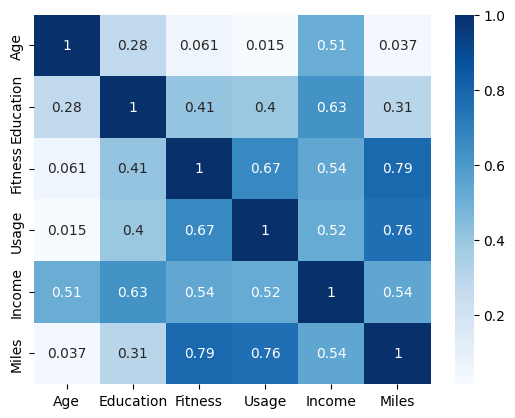

In [57]:
sns.heatmap(data = df2.corr(), annot= True, cmap = 'Blues')
plt.show()

# Inferences from the above **Heat Map** and **Correlation**

1.   **Fitness level** and **Miles** per week seems to have **high correlation**.
2.   **Miles** and **Usage** are also highly correlated.
3.   **Fitness** and **Usage** also have positive correlation
4.   **Age** has **least** correlation with Usage, Fitness, Education and Miles covered.
5.   Comparatively, **Education** is **less correlated** to people's Fitness, Usage and Miles.

From the above data, We can clearly say that if people like to walk/run more tend to use the treadmill more often. People with high fitness level can able to cover more miles in a week.


# 6. Customer Profiling - Categorization of users.

In [58]:
df7 = df_new[df_new.Product == 'KP281']
pd.crosstab(index = [df7.Gender], columns = [df7.Age_bin, df7.Income_bin], margins = True, margins_name = 'Total')

#Contigency Table gives the details of Gender, Age, Income for the population who bought KP281 Model - Customer Profiling

Age_bin     Under_25                     25-35                          \
Income_bin Under_44k 44k-51k 51k-59k Under_44k 44k-51k 51k-59k 59k-81k   
Gender                                                                   
Female            13       3       1         1       9       6       2   
Male              15       2       0         0       4       9       1   
Total             28       5       1         1      13      15       3   

Age_bin        35-45                         Total  
Income_bin Under_44k 44k-51k 51k-59k 59k-81k        
Gender                                              
Female             1       0       2       2    40  
Male               0       2       5       2    40  
Total              1       2       7       4    80

# Inferences from the above Table
1.  Customer Profile for **KP281** Model:
*   Most of the sales came from the people who are **under_25 age** and annual income **under $44,000**.

*   People who are **25 to 25** age and annual income **44,000 to 59,000** have preferred this model significantly.
*   Female and Male Population have bought this model equally.

In [59]:
df7 = df_new[df_new.Product == 'KP481']
pd.crosstab(index = [df7.Gender], columns = [df7.Age_bin, df7.Income_bin], margins = True, margins_name = 'Total')

#Contigency Table gives the details of Gender, Age, Income for the population who bought KP481 Model- Customer Profiling

Age_bin     Under_25                   25-35                   35-45          \
Income_bin Under_44k 44k-51k 51k-59k 44k-51k 51k-59k 59k-81k 44k-51k 51k-59k   
Gender                                                                         
Female             7       5       0       6       5       2       1       1   
Male               8       7       1       1       7       3       0       2   
Total             15      12       1       7      12       5       1       3   

Age_bin            Total  
Income_bin 59k-81k        
Gender                    
Female           2    29  
Male             2    31  
Total            4    60

# Inferences from the above Table
2.  Customer Profile for **KP481** Model:
*   Most of the sales came from the people who are in **Under_25 to 35 age** and annual income between **$44,000 to $59,000**.
*   Female and Male Population have bought this model almost equally.

In [60]:
df7 = df_new[df_new.Product == 'KP781']
pd.crosstab(index = [df7.Gender], columns = [df7.Age_bin, df7.Income_bin], margins = True, margins_name = 'Total')

#Contigency Table gives the details of Gender, Age, Income for the population who bought KP781 Model - Customer Profiling

Age_bin    Under_25                   25-35                       35-45 Total
Income_bin  44k-51k 51k-59k 59k-81k 51k-59k 59k-81k Above 81k Above 81k      
Gender                                                                       
Female            0       2       1       0       1         3         0     7
Male              5       3       6       1       2        10         6    33
Total             5       5       7       1       3        13         6    40

# Inferences from the above Table
3.  Customer Profile for **KP781** Model:
*   Most of the sales came from the people who are in **25 to 35 age** and annual income **Above $81,000**.
*   **Male** Population have bought this model significantly.


# Recommendations:

1.  We know that KP281 is the basic model and which is afforable among all. From the above analysis, its also proven that KP281 one is the most bought among
other model.

  **Target Audience**: People who are in their **Young ages, with average/below average fitness level, Average to Below average Income Level and who expect to walk less**
  **Note**: Male population and Female Population preferred this model equally.

2.  KP481 Model, It is the intermediate model.

  **Target Audience**: People who are in their **Middle ages, with Average average fitness level, Average Income Level, Expected Moderate miles to walk**
   **Note**: Male population and Female Population preferred this model equally.
3.  KP781 Model, It is the Top model. It is also the costlier variant.

  Only few people preferred this model because it is Advanced and Costlier.

  **Target Audience**: People who are experienced in their fitness journey, Young and Middle ages who have high Income, with high fitness level and people who Expected More miles to walk were preferred this.
  **Note**: Male population who preferred this model more than Female popuation.

4.   Consider all these parameters and market the each products wisely
5.   Collect necessary information from the customer like(Age, Income, Fitness level, Miles) before recommending the product. Recommending right product to the customer strength the trust and relationship on the company.
